In [7]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 527.3 kB/s eta 0:00:00a 0:00:01
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.0/291.0 kB 854.4 kB/s eta 0:00:00a 0:00:01
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)


In [8]:
!pip install textblob


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 5.1 MB/s eta 0:00:00a 0:00:01


In [10]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 139.3 kB/s eta 0:00:00a 0:00:01


In [19]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 2.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 2.6 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [20]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [21]:
df = pd.read_json('@informs_tweets.json')

In [22]:
df

,id,text
0,1724603588268233071,RT @BDLeibowicz: Thank you to @INFORMS for sen...
1,1724582134789361963,Mathematics professor Susan Martonosi has rece...
2,1724581030428876841,Proud of the @umassinforms student chapter &am...
3,1724580395226656870,Proud of the @umassinforms student chapter &am...
4,1724553615535403470,@mariuszoican @INFORMS Congratulations!
5,1724534879612760428,@INFORMS Good way of widely disseminating the ...
6,1724534081415991410,RT @INFORMS: INFORMS Member in a Minute from t...
7,1724515902497202285,RT @BDLeibowicz: Thank you to @INFORMS for sen...
8,1724515771781361720,Our paper on trading #gamification was just ac...
9,1724513559910986038,Thank you to @INFORMS for sending me this grea...


In [23]:
text_df = df.drop(['id'], axis=1)
text_df.head()

,text
0,RT @BDLeibowicz: Thank you to @INFORMS for sen...
1,Mathematics professor Susan Martonosi has rece...
2,Proud of the @umassinforms student chapter &am...
3,Proud of the @umassinforms student chapter &am...
4,@mariuszoican @INFORMS Congratulations!


In [24]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [25]:
text_df.text = text_df['text'].apply(data_processing)

In [26]:
text_df = text_df.drop_duplicates('text')

In [27]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [28]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [29]:
text_df.head()

,text
0,rt bdleibowicz thank informs sending great loo...
1,mathematics professor susan martonosi received...
2,proud umassinforms student chapter amp great t...
3,proud umassinforms student chapter amp great t...
4,mariuszoican informs congratulations


In [30]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [31]:

text_df['polarity'] = text_df['text'].apply(polarity)

In [32]:
text_df.head()

,text,polarity
0,rt bdleibowicz thank informs sending great loo...,0.80
1,mathematics professor susan martonosi received...,0.25
2,proud umassinforms student chapter amp great t...,0.55
3,proud umassinforms student chapter amp great t...,0.55
4,mariuszoican informs congratulations,0.00


In [33]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [34]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [35]:
text_df.head()

,text,polarity,sentiment
0,rt bdleibowicz thank informs sending great loo...,0.80,Positive
1,mathematics professor susan martonosi received...,0.25,Positive
2,proud umassinforms student chapter amp great t...,0.55,Positive
3,proud umassinforms student chapter amp great t...,0.55,Positive
4,mariuszoican informs congratulations,0.00,Neutral


In [37]:
text_df = text_df.drop_duplicates('text')

<Axes: xlabel='sentiment', ylabel='count'>

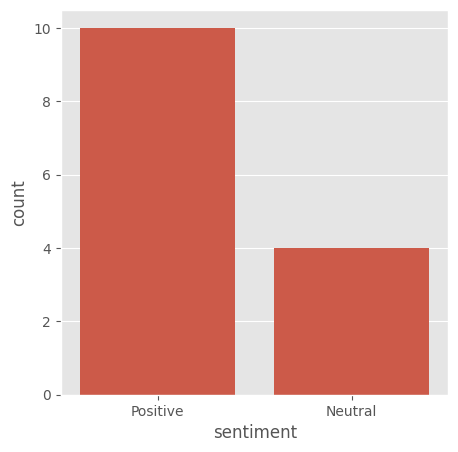

In [38]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

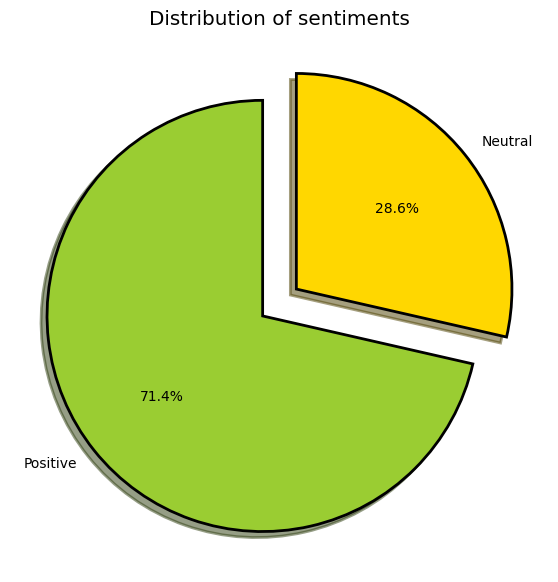

In [40]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [41]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
0,rt bdleibowicz thank informs sending great loo...,0.80,Positive
9,thank informs sending great looking book seems...,0.80,Positive
2,proud umassinforms student chapter amp great t...,0.55,Positive
3,proud umassinforms student chapter amp great t...,0.55,Positive
10,hosted lauraalbertphd wilbert steffy distingui...,0.35,Positive


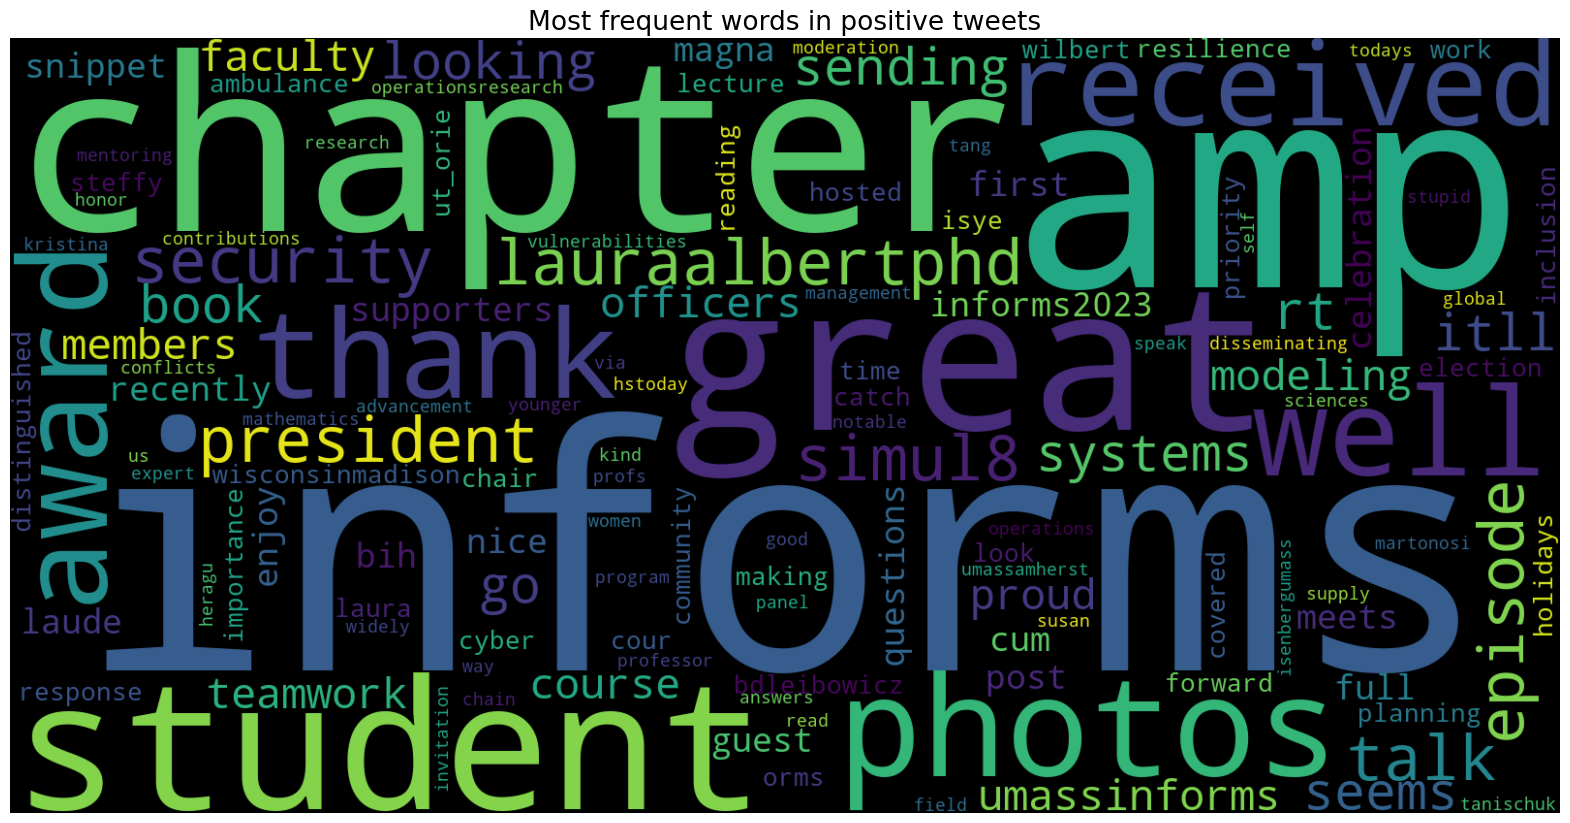

In [42]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [43]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
4,mariuszoican informs congratulations,0.0,Neutral
6,rt informs informs member minute 2023 informs ...,0.0,Neutral
8,paper trading gamification accepted management...,0.0,Neutral
13,rt informs datadriven optimization enhancing c...,0.0,Neutral


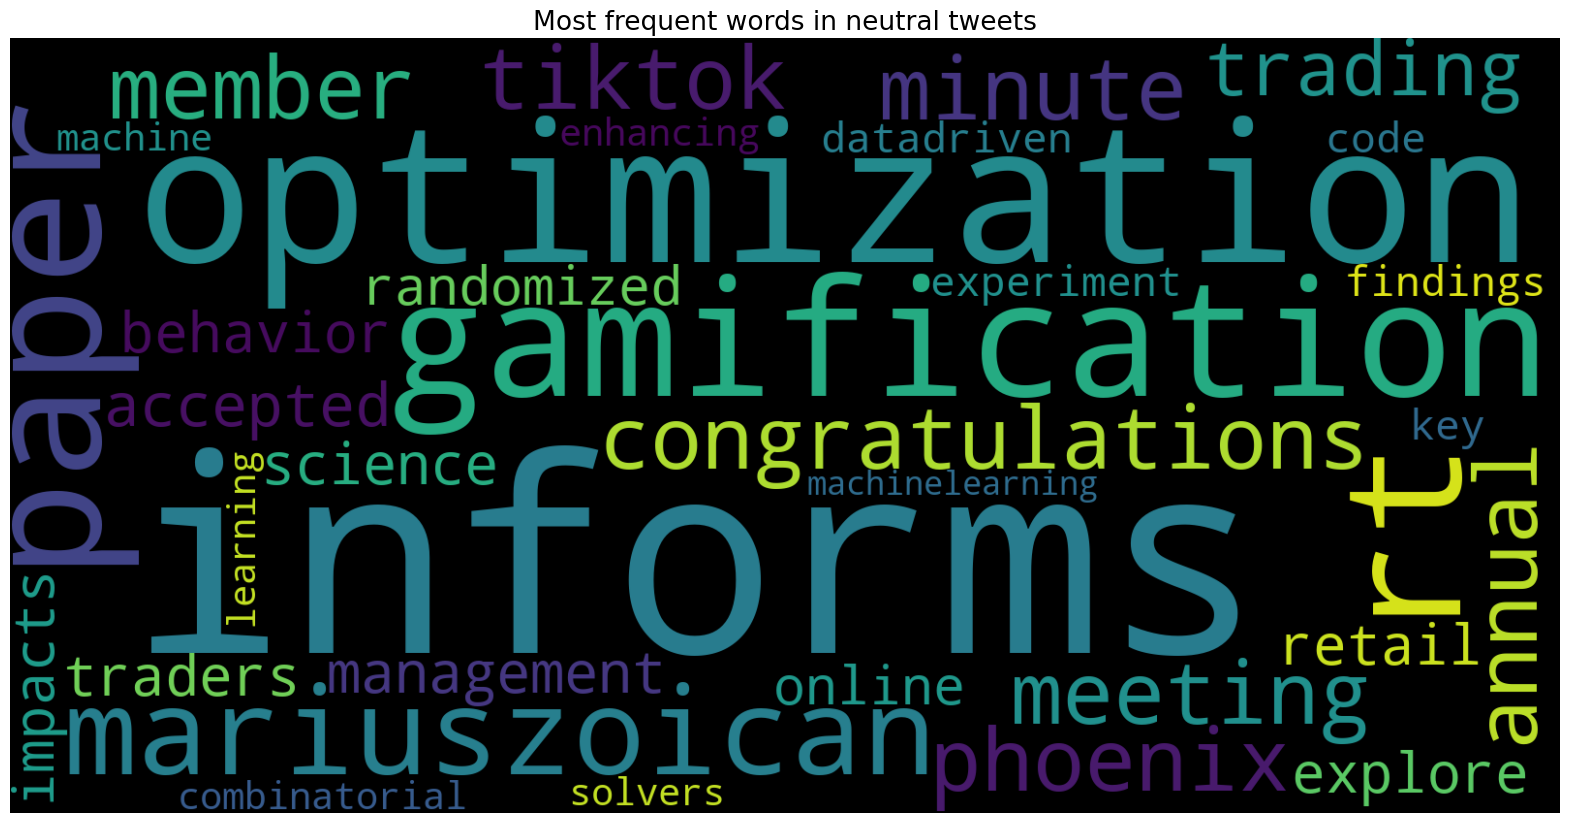

In [44]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()